# Loan Regression

## import library and read dataset

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
# read dataset with pandas

df = pd.read_csv('./loans.csv', index_col="client_id")
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


### exploration of the dataset

In [136]:
# shape of data set and name columns

print(df.shape)
print(df.columns)

(443, 7)
Index(['loan_type', 'loan_amount', 'repaid', 'loan_id', 'loan_start',
       'loan_end', 'rate'],
      dtype='object')


In [137]:
# checking the data types of the columns

df.dtypes

loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

In [138]:
# get general information about data set

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


In [139]:
# Statistical description of numerical data sets

df.describe()

,loan_amount,repaid,loan_id,rate
count,443.000000,443.000000,443.000000,443.000000
mean,7982.311512,0.534989,11017.101580,3.217156
std,4172.891992,0.499338,581.826222,2.397168
min,559.000000,0.000000,10009.000000,0.010000
25%,4232.500000,0.000000,10507.500000,1.220000
50%,8320.000000,1.000000,11033.000000,2.780000
75%,11739.000000,1.000000,11526.000000,4.750000
max,14971.000000,1.000000,11991.000000,12.620000


In [140]:
# Statistical description of non-numerical data sets

df.describe(exclude=[np.number])

,loan_type,loan_start,loan_end
count,443,443,443
unique,4,430,428
top,home,2007-05-16,2008-08-29
freq,121,2,2


In [141]:
# with nunique show different types for each feature

df.nunique()

loan_type        4
loan_amount    438
repaid           2
loan_id        443
loan_start     430
loan_end       428
rate           336
dtype: int64

In [142]:
# the number of different values for the loan_type column

df['loan_type'].value_counts()

loan_type
home      121
cash      108
credit    107
other     107
Name: count, dtype: int64

In [143]:
# the number of different values for the repaid column

df['repaid'].value_counts()

repaid
1    237
0    206
Name: count, dtype: int64

In [144]:
# checking for the missing values

df.isnull().sum()

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

#### remove the loan_id feature

In [145]:
# drop loan_id

df = df.drop(['loan_id'], axis=1)
df.head()

,loan_type,loan_amount,repaid,loan_start,loan_end,rate
client_id,,,,,,
46109,home,13672,0,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,2003-10-21,2005-07-17,1.25
46109,home,12734,1,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,2010-07-07,2012-05-21,3.13


#### change the data types

In [146]:
# We need to change the type of columns loan_type, loan_start and loan_end and repaid

df['repaid'] = df['repaid'].astype('category')
df['loan_type'] = df['loan_type'].astype('category')

df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])

df.dtypes

loan_type            category
loan_amount             int64
repaid               category
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

#### handling missing values

In [147]:
# Selection of numeric columns

df_numeric_features = df.select_dtypes(include=['number'])
print(f"Numeric Features: \n{df_numeric_features}\n")

Numeric Features: 
           loan_amount  rate
client_id                   
46109            13672  2.15
46109             9794  1.25
46109            12734  0.68
46109            12518  1.24
46109            14049  3.13
...                ...   ...
26945            12963  2.46
26945             1728  5.27
26945             9329  5.65
26945             4197  4.50
26945             3643  0.13

[443 rows x 2 columns]



In [148]:
# Selection of category columns

df_category_features = df.select_dtypes(include=['category'])
print(f"Categorical Features: \n{df_category_features}\n")

Categorical Features: 
          loan_type repaid
client_id                 
46109          home      0
46109        credit      0
46109          home      1
46109          cash      1
46109        credit      1
...             ...    ...
26945         other      0
26945        credit      1
26945         other      0
26945          home      0
26945          home      0

[443 rows x 2 columns]



In [149]:
# Selection of datetime columns

df_datetime_features = df.select_dtypes(include=['datetime'])
print(f"Datetime Features: \n{df_datetime_features}\n")

Datetime Features: 
          loan_start   loan_end
client_id                      
46109     2002-04-16 2003-12-20
46109     2003-10-21 2005-07-17
46109     2006-02-01 2007-07-05
46109     2010-12-08 2013-05-05
46109     2010-07-07 2012-05-21
...              ...        ...
26945     2001-11-26 2004-06-11
26945     2004-01-27 2005-06-21
26945     2001-12-17 2004-07-22
26945     2003-10-16 2005-07-10
26945     2010-03-24 2011-12-22

[443 rows x 2 columns]



In [150]:
# Selection of object columns

df_object_features = df.select_dtypes(include=['object'])
print(f"Object Features: \n{df_object_features}\n")

Object Features: 
Empty DataFrame
Columns: []
Index: [46109, 46109, 46109, 46109, 46109, 46109, 46109, 46109, 46109, 46109, 46109, 46109, 46109, 46109, 46109, 46109, 46109, 46109, 46109, 46109, 49545, 49545, 49545, 49545, 49545, 49545, 49545, 49545, 49545, 49545, 49545, 49545, 49545, 49545, 49545, 49545, 49545, 49545, 49545, 49545, 41480, 41480, 41480, 41480, 41480, 41480, 41480, 41480, 41480, 41480, 41480, 41480, 41480, 41480, 41480, 41480, 41480, 41480, 41480, 41480, 46180, 46180, 46180, 46180, 46180, 46180, 46180, 46180, 46180, 46180, 46180, 46180, 46180, 46180, 46180, 46180, 46180, 46180, 46180, 46180, 25707, 25707, 25707, 25707, 25707, 25707, 25707, 25707, 25707, 25707, 25707, 25707, 25707, 25707, 25707, 25707, 25707, 25707, 25707, 25707, ...]

[443 rows x 0 columns]



#### fill missing values by simpleimputer class

In [151]:
from sklearn.impute import SimpleImputer

# strategy = ["mean", "median", "most_frequent", "constant: fill_value=50"]

imputer1 = SimpleImputer(strategy='mean')
df_numeric_features = pd.DataFrame(imputer1.fit_transform(df_numeric_features), columns=df_numeric_features.columns)

imputer2 = SimpleImputer(strategy='most_frequent')
df_category_features = pd.DataFrame(imputer2.fit_transform(df_category_features), columns=df_category_features.columns)

#### fill missing values by mode

In [152]:
# fill datetime with mode

most_frequent_datetime = df_datetime_features['loan_start'].mode()[0]
df_datetime_features['loan_start'] = df_datetime_features['loan_start'].fillna(most_frequent_datetime)

most_frequent_datetime = df_datetime_features['loan_end'].mode()[0]
df_datetime_features['loan_end'] = df_datetime_features['loan_end'].fillna(most_frequent_datetime)

#### concatenation of all dataframe

In [153]:
df_numeric_features.reset_index(drop=True, inplace=True)
df_category_features.reset_index(drop=True, inplace=True)
df_datetime_features.reset_index(drop=True, inplace=True)

df = pd.concat([df_numeric_features, df_category_features, df_datetime_features], axis=1)
df.head()

,loan_amount,rate,loan_type,repaid,loan_start,loan_end
0,13672.0,2.15,home,0,2002-04-16,2003-12-20
1,9794.0,1.25,credit,0,2003-10-21,2005-07-17
2,12734.0,0.68,home,1,2006-02-01,2007-07-05
3,12518.0,1.24,cash,1,2010-12-08,2013-05-05
4,14049.0,3.13,credit,1,2010-07-07,2012-05-21


## handeling outlier values

#### show boxplot for outliers

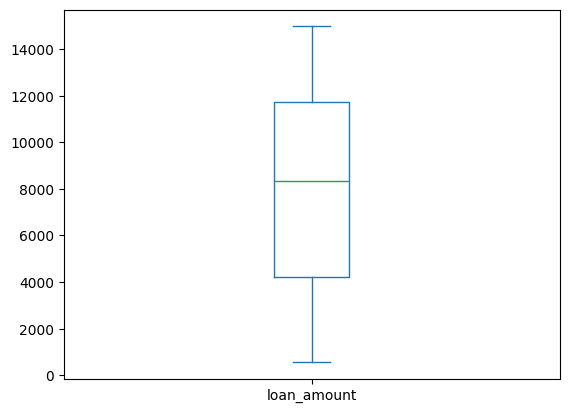

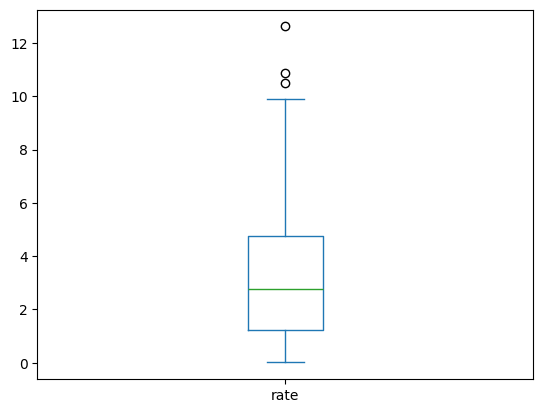

In [154]:
df['loan_amount'].plot(kind='box')
plt.show()

df['rate'].plot(kind='box')
plt.show()

### Outliers Detections

In [155]:
# find outlier by IQR

def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    return column[(column < lower_bound) | (upper_bound < column)]


for i, column in enumerate(df_numeric_features.columns):
    outliers = find_outliers(df_numeric_features[column])

    if (outliers.size > 0):
        print(f"outliers - {column} : \n{outliers}")


outliers - rate : 
41     10.49
195    10.89
421    12.62
Name: rate, dtype: float64


In [156]:
# find outlier by Z-Score

import scipy.stats as stats

df['zscore_rate'] = stats.zscore(df['rate'])
df['zscore_loan_amount'] = stats.zscore(df['loan_amount'])
df.head()

,loan_amount,rate,loan_type,repaid,loan_start,loan_end,zscore_rate,zscore_loan_amount
0,13672.0,2.15,home,0,2002-04-16,2003-12-20,-0.445677,1.365030
1,9794.0,1.25,credit,0,2003-10-21,2005-07-17,-0.821544,0.434647
2,12734.0,0.68,home,1,2006-02-01,2007-07-05,-1.059594,1.139991
3,12518.0,1.24,cash,1,2010-12-08,2013-05-05,-0.825721,1.088170
4,14049.0,3.13,credit,1,2010-07-07,2012-05-21,-0.036399,1.455477


In [157]:
outliers = df[(df['zscore_rate'] < -3) | (3 < df['zscore_rate']) | (df['zscore_loan_amount'] < -3) | (3 < df['zscore_loan_amount'])]
outliers

,loan_amount,rate,loan_type,repaid,loan_start,loan_end,zscore_rate,zscore_loan_amount
41,2947.0,10.49,credit,1,2005-11-10,2008-03-16,3.037362,-1.208036
195,6318.0,10.89,other,0,2003-02-02,2005-05-08,3.204415,-0.399290
421,8133.0,12.62,home,1,2009-03-14,2011-03-21,3.926916,0.036152


#### drop records containing outliers

In [158]:
df = df[(df['zscore_rate'] > -3) & (3 > df['zscore_rate']) & (df['zscore_loan_amount'] > -3) & (3 > df['zscore_loan_amount'])]
df.shape

(440, 8)

In [159]:
# drop zscore columns

df = df.drop(['zscore_rate', 'zscore_loan_amount'], axis=1)
df.head()

,loan_amount,rate,loan_type,repaid,loan_start,loan_end
0,13672.0,2.15,home,0,2002-04-16,2003-12-20
1,9794.0,1.25,credit,0,2003-10-21,2005-07-17
2,12734.0,0.68,home,1,2006-02-01,2007-07-05
3,12518.0,1.24,cash,1,2010-12-08,2013-05-05
4,14049.0,3.13,credit,1,2010-07-07,2012-05-21


## Transformations and columns Distributions and Skew 

In [160]:
# For numerical column rate and loan_amount, create two new columns and calculate the log and sqrt.

# for rate

df['log_rate'] = np.log(df['rate'])
df['sqrt_rate'] = np.sqrt(df['rate'])
df.head()

,loan_amount,rate,loan_type,repaid,loan_start,loan_end,log_rate,sqrt_rate
0,13672.0,2.15,home,0,2002-04-16,2003-12-20,0.765468,1.466288
1,9794.0,1.25,credit,0,2003-10-21,2005-07-17,0.223144,1.118034
2,12734.0,0.68,home,1,2006-02-01,2007-07-05,-0.385662,0.824621
3,12518.0,1.24,cash,1,2010-12-08,2013-05-05,0.215111,1.113553
4,14049.0,3.13,credit,1,2010-07-07,2012-05-21,1.141033,1.769181


In [161]:
# After calculating the log and sqrt, we can calculate the skewness value for all three states using the skew function.
# And we must keep in mind that the closer the skewness is to 0, the more normal the data is. 

from scipy.stats import skew

print(f"Rate Skewness: {skew(df['rate'])}")
print(f"Log_Rate Skewness: {skew(df['log_rate'])}")
print(f"Sqrt_Rate Skewness: {skew(df['sqrt_rate'])}")

Rate Skewness: 0.7568149302644803
Log_Rate Skewness: -1.6132127275514359
Sqrt_Rate Skewness: -0.004918465813182981


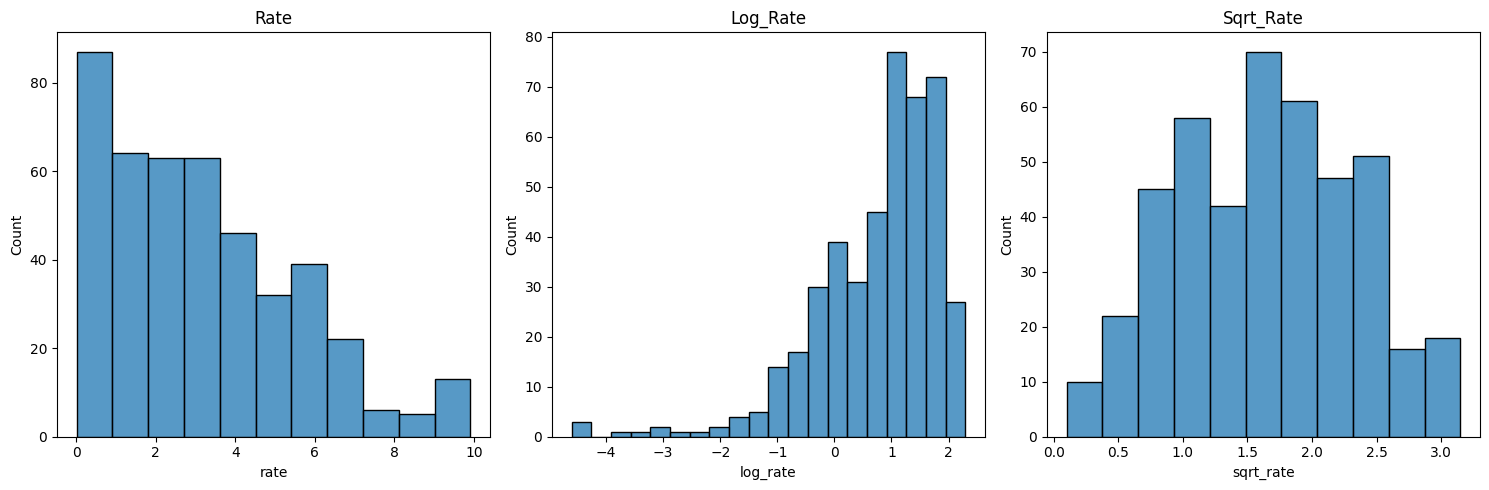

In [162]:
# And we can show the normality of each of these columns graphically and compare the skewness in each one.
# In the case of column rate, we notice that the original data has a positive skewness and the log data has a negative skewness,
# but the sqrt has a more normal skewness.

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(x=df['rate'], ax=axes[0])
sns.histplot(x=df['log_rate'], ax=axes[1])
sns.histplot(x=df['sqrt_rate'], ax=axes[2])
axes[0].set_title('Rate')
axes[1].set_title('Log_Rate')
axes[2].set_title('Sqrt_Rate')
plt.tight_layout()
plt.show()

In [163]:
print(f"mean of rate: {df['rate'].mean()}")
print(f"mean of log_rate: {df['log_rate'].mean()}")
print(f"mean of sqrt_rate: {df['sqrt_rate'].mean()}")

mean of rate: 3.161818181818182
mean of log_rate: 0.7523321265428069
mean of sqrt_rate: 1.6411938929056753


In [164]:
# in the column related to rate we notice that the sqrt of the data has a more normal value and we can replace the main column rate

df = df.drop(columns=['rate', 'log_rate'])
df = df.rename(columns={'sqrt_rate':'rate'})
df.head()

,loan_amount,loan_type,repaid,loan_start,loan_end,rate
0,13672.0,home,0,2002-04-16,2003-12-20,1.466288
1,9794.0,credit,0,2003-10-21,2005-07-17,1.118034
2,12734.0,home,1,2006-02-01,2007-07-05,0.824621
3,12518.0,cash,1,2010-12-08,2013-05-05,1.113553
4,14049.0,credit,1,2010-07-07,2012-05-21,1.769181


In [165]:
df['log_loan_amount'] = np.log(df['loan_amount'])
df['sqrt_loan_amount'] = np.sqrt(df['loan_amount'])
df.head()

,loan_amount,loan_type,repaid,loan_start,loan_end,rate,log_loan_amount,sqrt_loan_amount
0,13672.0,home,0,2002-04-16,2003-12-20,1.466288,9.523105,116.927328
1,9794.0,credit,0,2003-10-21,2005-07-17,1.118034,9.189525,98.964640
2,12734.0,home,1,2006-02-01,2007-07-05,0.824621,9.452031,112.845026
3,12518.0,cash,1,2010-12-08,2013-05-05,1.113553,9.434923,111.883868
4,14049.0,credit,1,2010-07-07,2012-05-21,1.769181,9.550306,118.528478


In [166]:
from scipy.stats import skew

print(f"Loan_amount Skewness: {skew(df['loan_amount'])}")
print(f"Log_Loan_amount Skewness: {skew(df['log_loan_amount'])}")
print(f"Sqrt_Loan_amount Skewness: {skew(df['sqrt_loan_amount'])}")

Loan_amount Skewness: -0.04662800006628366
Log_Loan_amount Skewness: -1.1014175307582514
Sqrt_Loan_amount Skewness: -0.4702723354656525


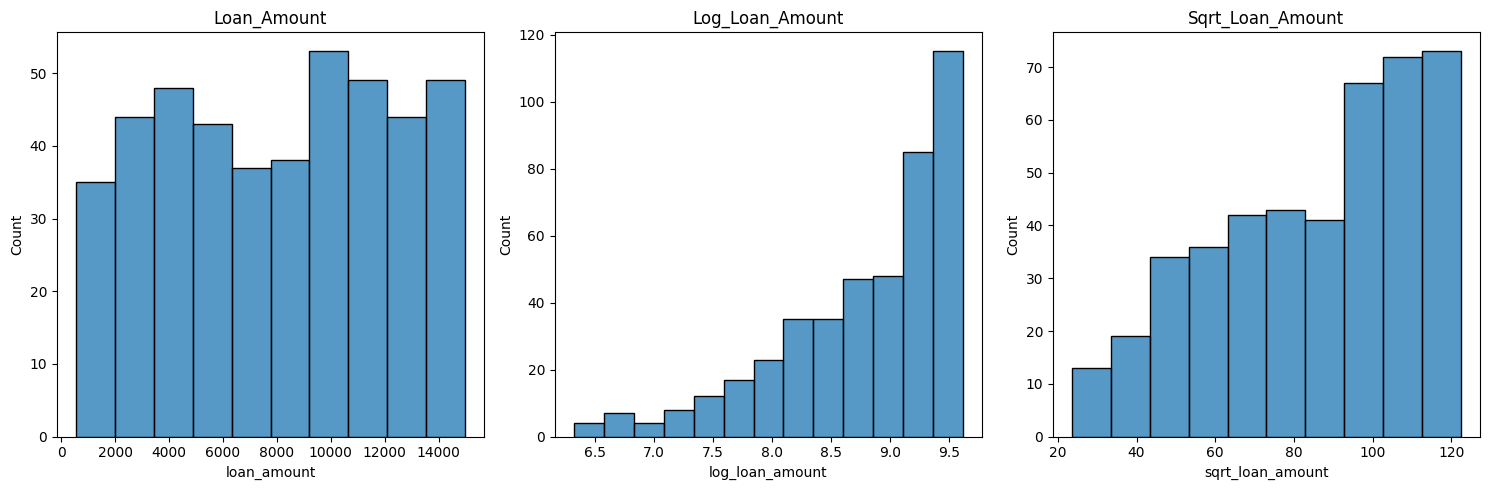

In [167]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(x=df['loan_amount'], ax=axes[0])
sns.histplot(x=df['log_loan_amount'], ax=axes[1])
sns.histplot(x=df['sqrt_loan_amount'], ax=axes[2])
axes[0].set_title('Loan_Amount')
axes[1].set_title('Log_Loan_Amount')
axes[2].set_title('Sqrt_Loan_Amount')
plt.tight_layout()
plt.show()

In [168]:
print(f"mean of rate: {df['loan_amount'].mean()}")
print(f"mean of log_rate: {df['log_loan_amount'].mean()}")
print(f"mean of sqrt_rate: {df['sqrt_loan_amount'].mean()}")

mean of rate: 7997.195454545455
mean of log_rate: 8.783165082539288
mean of sqrt_rate: 85.58199357973754


In [169]:
df = df.drop(columns=['sqrt_loan_amount', 'log_loan_amount'])
df.head()

,loan_amount,loan_type,repaid,loan_start,loan_end,rate
0,13672.0,home,0,2002-04-16,2003-12-20,1.466288
1,9794.0,credit,0,2003-10-21,2005-07-17,1.118034
2,12734.0,home,1,2006-02-01,2007-07-05,0.824621
3,12518.0,cash,1,2010-12-08,2013-05-05,1.113553
4,14049.0,credit,1,2010-07-07,2012-05-21,1.769181


## Scaling the numerical features(Standardization and Normalization)

#### Standardization

In [170]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head()

,loan_amount,loan_type,repaid,loan_start,loan_end,rate
0,1.359338,home,0,2002-04-16,2003-12-20,-0.255589
1,0.430405,credit,0,2003-10-21,2005-07-17,-0.764490
2,1.134650,home,1,2006-02-01,2007-07-05,-1.193253
3,1.082909,cash,1,2010-12-08,2013-05-05,-0.771039
4,1.449644,credit,1,2010-07-07,2012-05-21,0.187026


In [171]:
from scipy.stats import skew

print(f"rate skewness: {skew(df['rate'])}")
print(f"loan amount skewness: {skew(df['loan_amount'])}")

rate skewness: -0.00491846581318291
loan amount skewness: -0.04662800006628367


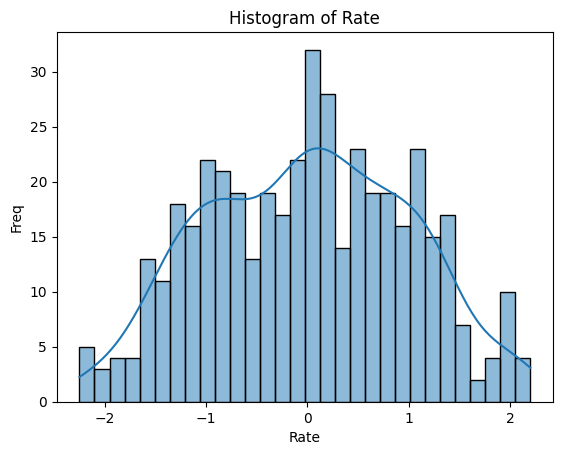

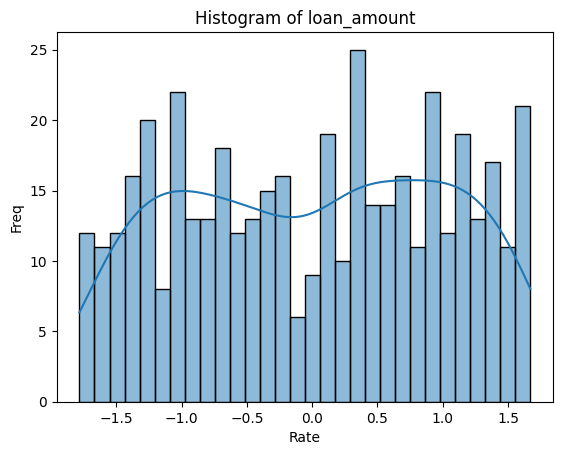

In [172]:
sns.histplot(df['rate'], bins=30, kde=True)
plt.title('Histogram of Rate')
plt.xlabel('Rate')
plt.ylabel('Freq')
plt.show()

sns.histplot(df['loan_amount'], bins=30, kde=True)
plt.title('Histogram of loan_amount')
plt.xlabel('Rate')
plt.ylabel('Freq')
plt.show()

#### normalization

In [173]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# numeric_columns = df.select_dtypes(include=['number']).columns
# df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
# df.head()

## Encoding categorical features

#### use get_dumies

In [174]:
# To encode categorical columns, we can use one of the following three methods

df_dumies = pd.get_dummies(df, columns=['loan_type'], prefix='LT', drop_first=False)
df_dumies.head()

,loan_amount,repaid,loan_start,loan_end,rate,LT_cash,LT_credit,LT_home,LT_other
0,1.359338,0,2002-04-16,2003-12-20,-0.255589,False,False,True,False
1,0.430405,0,2003-10-21,2005-07-17,-0.764490,False,True,False,False
2,1.134650,1,2006-02-01,2007-07-05,-1.193253,False,False,True,False
3,1.082909,1,2010-12-08,2013-05-05,-0.771039,True,False,False,False
4,1.449644,1,2010-07-07,2012-05-21,0.187026,False,True,False,False


#### use OneHotEncoder

In [175]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

encoded_features = encoder.fit_transform(df[['loan_type']]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['loan_type']))
df_one_hot = pd.concat([df.drop('loan_type', axis=1), encoded_df], axis=1)
df_one_hot

,loan_amount,repaid,loan_start,loan_end,rate,loan_type_cash,loan_type_credit,loan_type_home,loan_type_other
0,1.359338,0,2002-04-16,2003-12-20,-0.255589,0.0,0.0,1.0,0.0
1,0.430405,0,2003-10-21,2005-07-17,-0.764490,0.0,1.0,0.0,0.0
2,1.134650,1,2006-02-01,2007-07-05,-1.193253,0.0,0.0,1.0,0.0
3,1.082909,1,2010-12-08,2013-05-05,-0.771039,1.0,0.0,0.0,0.0
4,1.449644,1,2010-07-07,2012-05-21,0.187026,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
441,-0.910295,0,2003-10-16,2005-07-10,0.701606,NaN,NaN,NaN,NaN
442,-1.043000,0,2010-03-24,2011-12-22,-1.871390,NaN,NaN,NaN,NaN
41,NaN,NaN,NaT,NaT,NaN,0.0,0.0,0.0,1.0
195,NaN,NaN,NaT,NaT,NaN,0.0,0.0,0.0,1.0


#### use LabelEncoder

In [176]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

encoded_series = pd.Series(label_encoder.fit_transform(df['loan_type']), name='loan_type_encoded')
encoded_series = encoded_series.reset_index(drop=True)
df = df.reset_index(drop=True)

df_label = pd.concat([df.drop('loan_type', axis=1), encoded_series], axis=1)
df_label

,loan_amount,repaid,loan_start,loan_end,rate,loan_type_encoded
0,1.359338,0,2002-04-16,2003-12-20,-0.255589,2
1,0.430405,0,2003-10-21,2005-07-17,-0.764490,1
2,1.134650,1,2006-02-01,2007-07-05,-1.193253,2
3,1.082909,1,2010-12-08,2013-05-05,-0.771039,0
4,1.449644,1,2010-07-07,2012-05-21,0.187026,1
...,...,...,...,...,...,...
435,1.189504,0,2001-11-26,2004-06-11,-0.106317,3
436,-1.501717,1,2004-01-27,2005-06-21,0.956350,1
437,0.319019,0,2001-12-17,2004-07-22,1.075189,3
438,-0.910295,0,2003-10-16,2005-07-10,0.701606,2


## Creating new derived features

In [177]:
df_loans = df
df_loans['loan_tenure'] = df_loans['loan_end'] - df_loans['loan_start']
df_loans

,loan_amount,loan_type,repaid,loan_start,loan_end,rate,loan_tenure
0,1.359338,home,0,2002-04-16,2003-12-20,-0.255589,613 days
1,0.430405,credit,0,2003-10-21,2005-07-17,-0.764490,635 days
2,1.134650,home,1,2006-02-01,2007-07-05,-1.193253,519 days
3,1.082909,cash,1,2010-12-08,2013-05-05,-0.771039,879 days
4,1.449644,credit,1,2010-07-07,2012-05-21,0.187026,684 days
...,...,...,...,...,...,...,...
435,1.189504,other,0,2001-11-26,2004-06-11,-0.106317,928 days
436,-1.501717,credit,1,2004-01-27,2005-06-21,0.956350,511 days
437,0.319019,other,0,2001-12-17,2004-07-22,1.075189,948 days
438,-0.910295,home,0,2003-10-16,2005-07-10,0.701606,633 days


In [178]:
import datetime as dt

df_loans['loan_tenure'] = df_loans['loan_tenure'].dt.days / 365
df_loans = df_loans.drop(['loan_start', 'loan_end'], axis=1)
df_loans

,loan_amount,loan_type,repaid,rate,loan_tenure
0,1.359338,home,0,-0.255589,1.679452
1,0.430405,credit,0,-0.764490,1.739726
2,1.134650,home,1,-1.193253,1.421918
3,1.082909,cash,1,-0.771039,2.408219
4,1.449644,credit,1,0.187026,1.873973
...,...,...,...,...,...
435,1.189504,other,0,-0.106317,2.542466
436,-1.501717,credit,1,0.956350,1.400000
437,0.319019,other,0,1.075189,2.597260
438,-0.910295,home,0,0.701606,1.734247


In [179]:
df_loans.dtypes

loan_amount    float64
loan_type       object
repaid          object
rate           float64
loan_tenure    float64
dtype: object

In [180]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

encoded_series = pd.Series(label_encoder.fit_transform(df['loan_type']), name='loan_type_encoded')
encoded_series = encoded_series.reset_index(drop=True)
df = df.reset_index(drop=True)

df_label = pd.concat([df.drop('loan_type', axis=1), encoded_series], axis=1)
df = df_label
df.head()

,loan_amount,repaid,loan_start,loan_end,rate,loan_tenure,loan_type_encoded
0,1.359338,0,2002-04-16,2003-12-20,-0.255589,1.679452,2
1,0.430405,0,2003-10-21,2005-07-17,-0.764490,1.739726,1
2,1.134650,1,2006-02-01,2007-07-05,-1.193253,1.421918,2
3,1.082909,1,2010-12-08,2013-05-05,-0.771039,2.408219,0
4,1.449644,1,2010-07-07,2012-05-21,0.187026,1.873973,1


In [187]:
from sklearn.model_selection import train_test_split

X = df.drop('loan_amount', axis=1)
y = df['loan_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((352, 6), (88, 6), (352,), (88,))

## Regressiom Models

#### single linear regression

In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

X_train_single = X_train[['rate']]
X_test_single = X_test[['rate']]

slr_model = LinearRegression()
slr_model.fit(X_train_single, y_train)

y_pred_single = slr_model.predict(X_test_single)

mse_single = mean_squared_error(y_test, y_pred_single)
r2_single = r2_score(y_test, y_pred_single)

print(f"MSE: {mse_single}")
print(f"R2: {r2_single}")

MSE: 0.9599412546023626
R2: -0.007436169112571722


#### multiple linear regression

In [192]:
# mlr_model = LinearRegression()
# mlr_model.fit(X_train, y_train)

# y_pred_multi = mlr_model.predict(X_test)

# mse_multi = mean_squared_error(y_test, y_pred_multi)
# r2_multi = r2_score(y_test, y_pred_multi)

# print(f"MSE: {mse_multi}")
# print(f"R2: {r2_multi}")

#### polynomial regression

In [191]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline

# poly_features = PolynomialFeatures(degree=2)
# poly_model = make_pipeline(poly_features, LinearRegression())

# poly_model.fit(X_train, y_train)

# y_pred_poly = poly_model.predict(X_test)

# mse_poly = mean_squared_error(y_test, y_pred_poly)
# r2_poly = r2_score(y_test, y_pred_poly)

# print(f"polynomial regression (Degree {degree}) - MSE: {mse_poly}, r2:{r2_poly}")